In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from autorocks.data.loader.all_models_result_aggregator import create_all_models_comparison_dataset
from autorocks.dir_struct import PackageRootDir
from sysgym.envs.rocksdb import schema
import re
import pandas as pd

param_space = schema.RocksDB10Params()

all_model = create_all_models_comparison_dataset(
    PackageRootDir / "ProcessedDataNew/rocksdb/iops/zippy_workload_15min/10_params/100_iter", save_results = False)

default = create_all_models_comparison_dataset(
    PackageRootDir / "ProcessedDataNew/rocksdb/iops/zippy_workload_15min/10_params/10_iter", save_results = False)

/Users/salabed/workspace/autorocks/autorocks/data/loader/exp_dao.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.sys_observations[col_name] = col_val
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_df = param_df.append(model_data.sys_params, ignore_index=True)
/Users/salabed/workspace/autorocks/autorocks/data/loader/all_models_result_aggregator.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_perf = model_perf.append(model_data.model_performance, ignore_index=True)
/U

In [8]:
import autorocks.viz.viz as viz

model_comparison_data_c = viz.unify_model_name(all_model)

metrics_df = model_comparison_data_c.combine_sys_params_metric()

In [10]:
init_metrics = metrics_df[metrics_df['step'] < 11]

In [23]:
init_metrics[['iops'] + model_comparison_data_c.sys_params.columns.to_list()].sort_values(by='iops', ascending = True).groupby('model').last(10)

,iops,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,max_bytes_for_level_multiplier,block_size,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,step,iteration
model,,,,,,,,,,,,,
BoBn,184775.0,1,1,67108864,2,1,10,4096,4,20,36,1,4
BoTorch_SingleTaskGP,128366.0,3,1,1058057983,101,25,10,43914,48,43,60,7,2
PBTTuner,138126.0,4,7,526228275,87,2,13,118939,36,22,36,10,0
Random,156038.0,5,6,997111559,74,1,10,37252,36,16,27,7,2
TPE,127900.0,5,2,344692244,23,3,11,18077,6,13,60,9,4


In [65]:
parameter_explored = init_metrics[['iops'] + model_comparison_data_c.sys_params.columns.to_list()]

filtered_df = parameter_explored[parameter_explored['model'].isin({"BoBn", "BoTorch_SingleTaskGP"})].copy()
filtered_df.loc[filtered_df['model'] == 'BoBn', 'model'] = 'DecomposedInit' 
filtered_df.loc[filtered_df['model'] == 'BoTorch_SingleTaskGP', 'model'] = 'RandomInit' 
filtered_df.rename(columns ={"model": "method"}, inplace=True)
filtered_df

,iops,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,max_bytes_for_level_multiplier,block_size,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,step,iteration,method
0,117505.0,3,5,794156378,123,15,20,35073,14,39,61,1,0,RandomInit
1,75215.0,5,6,128197278,98,19,13,99439,49,42,54,2,0,RandomInit
2,112905.0,6,9,568999281,127,25,14,41661,60,28,32,3,0,RandomInit
3,123121.0,1,1,994138277,63,21,9,13803,22,59,28,4,0,RandomInit
4,122138.0,5,7,1011654040,115,11,12,83308,34,37,9,5,0,RandomInit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,114360.0,1,8,540681621,72,29,17,31735,52,19,40,6,4,DecomposedInit
1406,124414.0,5,5,900019402,18,6,8,97538,14,47,16,7,4,DecomposedInit
1407,127742.0,4,3,1024083937,17,13,12,4964,5,28,3,8,4,DecomposedInit
1408,104544.0,2,6,398835842,87,21,13,69242,61,32,43,9,4,DecomposedInit


In [66]:
end_of_warmup_df = filtered_df.sort_values(by='iops', ascending = True).groupby(['method', 'iteration']).last(1).reset_index()
end_of_warmup_df

,method,iteration,iops,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,max_bytes_for_level_multiplier,block_size,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,step
0,DecomposedInit,0,182275.0,1,1,67108864,2,1,10,4096,4,20,36,1
1,DecomposedInit,1,182374.0,1,1,67108864,2,1,10,4096,4,20,36,1
2,DecomposedInit,2,184171.0,1,1,67108864,2,1,10,4096,4,20,36,1
3,DecomposedInit,3,184742.0,1,1,67108864,2,1,10,4096,4,20,36,1
4,DecomposedInit,4,184775.0,1,1,67108864,2,1,10,4096,4,20,36,1
5,RandomInit,0,123121.0,1,1,994138277,63,21,9,13803,22,59,28,4
6,RandomInit,1,124464.0,4,8,919247279,47,8,6,90989,44,37,38,8
7,RandomInit,2,128366.0,3,1,1058057983,101,25,10,43914,48,43,60,7
8,RandomInit,3,126664.0,5,5,1033981793,70,3,7,115740,37,27,57,6
9,RandomInit,4,124767.0,3,2,983953572,69,28,12,41595,19,52,36,4


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


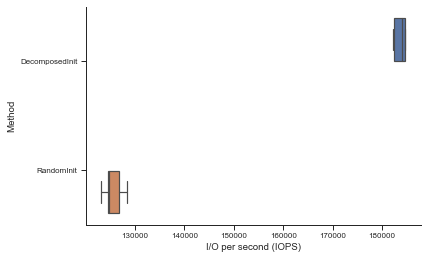

In [78]:
import seaborn as sns 
import matplotlib.pyplot as plt


ax = sns.boxplot(end_of_warmup_df, y='method', x='iops', hue= 'method')
ax.set(ylabel='Method', xlabel='I/O per second (IOPS)')
ax.get_legend().set_visible(False)

sampling_output_path = "/Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoBn/Figures/sampling"

plt.savefig(sampling_output_path + "/iops.pdf", bbox_inches = 'tight')
plt.savefig(sampling_output_path + "/iops.svg", bbox_inches = 'tight')


In [79]:
def generate_lows(pspace):
    """Generates default configuration for first iteration."""
    res = {}
    for param in pspace.parameters():
        res[param.name] = param.box.lower_bound
    return res

def generate_defaults(pspace):
    """Generates default configuration for first iteration."""
    res = {}
    for param in pspace.parameters():
        res[param.name] = param.box.default
    return res


defaults_df = pd.DataFrame([generate_defaults(param_space)])
defaults_df['method'] = "Default"


lower_df = pd.DataFrame([generate_lows(param_space)])
lower_df['method'] = "LowerBound"


def generate_upper(pspace):
    """Generates default configuration for first iteration."""
    res = {}
    for param in pspace.parameters():
        res[param.name] = param.box.upper_bound
    return res


upper_df = pd.DataFrame([generate_upper(param_space)])
upper_df['method'] = "UpperBound"


In [85]:
for para in param_space.parameters():
    readable_name = para.name.replace("_", " ").title()
    print(readable_name)
    ax = sns.scatterplot(filtered_df, x = "iteration", y = para.name, hue = 'method', palette = "deep")
    ax.axhline(y = defaults_df[para.name].mean(), color = 'green', label = 'Default')
    ax.axhline(y = upper_df[para.name].mean(), color = 'purple', label = 'UpperBound')
    ax.axhline(y = lower_df[para.name].mean(), color = 'red', label = 'LowerBound')

    ax.legend()
    ax.set(xlabel = "Restart", ylabel = readable_name)
    plt.savefig(sampling_output_path + "/" + para.name + "_sampling.pdf", bbox_inches = 'tight')
    plt.savefig(sampling_output_path + "/" + para.name + "_sampling.svg", bbox_inches = 'tight')
    plt.close()
    

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Max Background Compactions


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Max Background Flushes


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Write Buffer Size


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Max Write Buffer Number


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Min Write Buffer Number To Merge


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Max Bytes For Level Multiplier


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Block Size


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Level0 File Num Compaction Trigger


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Level0 Slowdown Writes Trigger


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Level0 Stop Writes Trigger


In [82]:
filtered_df

,iops,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,max_bytes_for_level_multiplier,block_size,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,step,iteration,method
0,117505.0,3,5,794156378,123,15,20,35073,14,39,61,1,0,RandomInit
1,75215.0,5,6,128197278,98,19,13,99439,49,42,54,2,0,RandomInit
2,112905.0,6,9,568999281,127,25,14,41661,60,28,32,3,0,RandomInit
3,123121.0,1,1,994138277,63,21,9,13803,22,59,28,4,0,RandomInit
4,122138.0,5,7,1011654040,115,11,12,83308,34,37,9,5,0,RandomInit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,114360.0,1,8,540681621,72,29,17,31735,52,19,40,6,4,DecomposedInit
1406,124414.0,5,5,900019402,18,6,8,97538,14,47,16,7,4,DecomposedInit
1407,127742.0,4,3,1024083937,17,13,12,4964,5,28,3,8,4,DecomposedInit
1408,104544.0,2,6,398835842,87,21,13,69242,61,32,43,9,4,DecomposedInit
